In [1]:
import os,shutil
# 原始目录所在的路径
original_dataset_dir='E://机器学习//fruit//train'
# 数据集分类后的目录
base_dir='E://机器学习//fruit//find_fruit'
os.mkdir(base_dir)

# # 训练、验证、测试数据集的目录
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validaiton')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

# 西瓜训练图片所在目录
train_xigua_dir = os.path.join(train_dir, 'xigua')
os.mkdir(train_xigua_dir)

# 哈密瓜训练图片所在目录
train_hami_dir = os.path.join(train_dir, 'hami')
os.mkdir(train_hami_dir)

# 西瓜验证图片所在目录
validation_xigua_dir = os.path.join(validation_dir, 'xigua')
os.mkdir(validation_xigua_dir)

# 哈密瓜验证数据集所在目录
validation_hami_dir = os.path.join(validation_dir, 'hami')
os.mkdir(validation_hami_dir)

# 西瓜测试数据集所在目录
test_xigua_dir = os.path.join(test_dir, 'xigua')
os.mkdir(test_xigua_dir)

# 哈密瓜测试数据集所在目录
test_hami_dir = os.path.join(test_dir, 'hami')
os.mkdir(test_hami_dir)

# 将前1000张西瓜图像复制到train
fnames = ['xigua.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_xigua_dir, fname)
    shutil.copyfile(src, dst)

# 将剩下500张西瓜图像复制到validation
fnames = ['xigua.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_xigua_dir, fname)
    shutil.copyfile(src, dst)

# 将剩下500张西瓜图像复制到test_xigua_dir
fnames = ['xigua.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_xigua_dir, fname)
    shutil.copyfile(src, dst)

# 将前1000张哈密瓜图像复制到train_hami_dir
fnames = ['hami.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_hami_dir, fname)
    shutil.copyfile(src, dst)

# 将前1000张哈密瓜图像复制到train_hami_dir
fnames = ['hami.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_hami_dir, fname)
    shutil.copyfile(src, dst)
    
# 将下500张哈密瓜图像复制到test_hami_dir
fnames = ['hami.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_hami_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import optimizers

In [3]:
from tensorflow.keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)
#验证样本生成器
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=train_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)
#测试样本生成器
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
#查看上面对于图片预处理的处理结果
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [5]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=30,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50
    )

Epoch 1/30
30/30 [==============================] - 299s 10s/step - loss: 0.6695 - acc: 0.6233 - val_loss: 0.5914 - val_acc: 0.7170
Epoch 2/30
30/30 [==============================] - 301s 10s/step - loss: 0.5539 - acc: 0.7450 - val_loss: 0.5174 - val_acc: 0.7370
Epoch 3/30
30/30 [==============================] - 290s 10s/step - loss: 0.5474 - acc: 0.7333 - val_loss: 0.5811 - val_acc: 0.6940
Epoch 4/30
30/30 [==============================] - 295s 10s/step - loss: 0.5775 - acc: 0.7333 - val_loss: 0.5092 - val_acc: 0.7480
Epoch 5/30
30/30 [==============================] - 297s 10s/step - loss: 0.4854 - acc: 0.7800 - val_loss: 0.4279 - val_acc: 0.7990
Epoch 6/30
30/30 [==============================] - 307s 10s/step - loss: 0.4991 - acc: 0.7467 - val_loss: 0.5712 - val_acc: 0.6800
Epoch 7/30
30/30 [==============================] - 311s 10s/step - loss: 0.4612 - acc: 0.7767 - val_loss: 0.5866 - val_acc: 0.7000
Epoch 8/30
30/30 [==============================] - 336s 11s/step - loss: 0.

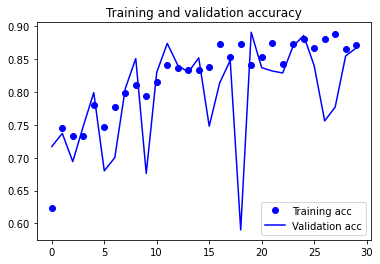

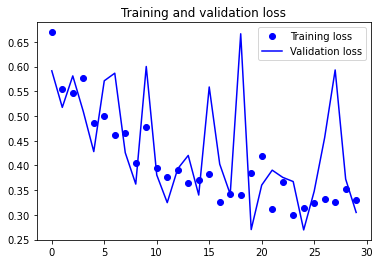

In [9]:
# 结果可视化
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()